In [2]:
!pip install pymongo

     |████████████████████████████████| 506 kB 45.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 22.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install tweepy

     |████████████████████████████████| 63 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 70.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.3 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [6]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [7]:

client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [8]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [9]:

count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [10]:

search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:24 +0000 2021'
'Wed Nov 03 20:23:22 +0000 2021'
'Wed Nov 03 20:23:22 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:19 +0000 2021'
'Wed Nov 03 20:23:19 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:16 +0000 2021'
'Wed Nov 03 20:23:16 +0000 2021'
'Wed Nov 03 20:23:15 +0000 2021'
'Wed Nov 03 20:23:15 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:13 +0000 2021'
'Wed Nov 0

In [11]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                      max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 03 20:22:38 +0000 2021'
'Wed Nov 03 20:22:38 +0000 2021'
'Wed Nov 03 20:22:38 +0000 2021'
'Wed Nov 03 20:22:37 +0000 2021'
'Wed Nov 03 20:22:36 +0000 2021'
'Wed Nov 03 20:22:35 +0000 2021'
'Wed Nov 03 20:22:35 +0000 2021'
'Wed Nov 03 20:22:35 +0000 2021'
'Wed Nov 03 20:22:35 +0000 2021'
'Wed Nov 03 20:22:34 +0000 2021'
'Wed Nov 03 20:22:34 +0000 2021'
'Wed Nov 03 20:22:34 +0000 2021'
'Wed Nov 03 20:22:33 +0000 2021'
'Wed Nov 03 20:22:33 +0000 2021'
'Wed Nov 03 20:22:32 +0000 2021'
'Wed Nov 03 20:22:32 +0000 2021'
'Wed Nov 03 20:22:31 +0000 2021'
'Wed Nov 03 20:22:30 +0000 2021'
'Wed Nov 03 20:22:30 +0000 2021'
'Wed Nov 03 20:22:29 +0000 2021'
'Wed Nov 03 20:22:29 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:26 +0000 2021'
'Wed Nov 03 20:22:25 +0000 2021'
'Wed Nov 03 20:22:25 +0000 2021'
'Wed Nov 0

KeyboardInterrupt: 

In [12]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

199
184


In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                      max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 03 20:21:46 +0000 2021'
'Wed Nov 03 20:21:45 +0000 2021'
'Wed Nov 03 20:21:44 +0000 2021'
'Wed Nov 03 20:21:43 +0000 2021'
'Wed Nov 03 20:21:43 +0000 2021'
'Wed Nov 03 20:21:42 +0000 2021'
'Wed Nov 03 20:21:42 +0000 2021'
'Wed Nov 03 20:21:41 +0000 2021'
'Wed Nov 03 20:21:41 +0000 2021'
'Wed Nov 03 20:21:40 +0000 2021'
'Wed Nov 03 20:21:39 +0000 2021'
'Wed Nov 03 20:21:39 +0000 2021'
'Wed Nov 03 20:21:38 +0000 2021'
'Wed Nov 03 20:21:38 +0000 2021'
'Wed Nov 03 20:21:38 +0000 2021'
'Wed Nov 03 20:21:37 +0000 2021'
'Wed Nov 03 20:21:37 +0000 2021'
'Wed Nov 03 20:21:37 +0000 2021'
'Wed Nov 03 20:21:37 +0000 2021'
'Wed Nov 03 20:21:37 +0000 2021'
'Wed Nov 03 20:21:36 +0000 2021'
'Wed Nov 03 20:21:36 +0000 2021'
'Wed Nov 03 20:21:36 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:32 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:19:50 +0000 2021'
'Wed Nov 03 20:19:50 +0000 2021'
'Wed Nov 03 20:19:48 +0000 2021'
'Wed Nov 03 20:19:48 +0000 2021'
'Wed Nov 03 20:19:48 +0000 2021'
'Wed Nov 03 20:19:48 +0000 2021'
'Wed Nov 03 20:19:47 +0000 2021'
'Wed Nov 03 20:19:47 +0000 2021'
'Wed Nov 03 20:19:47 +0000 2021'
'Wed Nov 03 20:19:47 +0000 2021'
'Wed Nov 03 20:19:46 +0000 2021'
'Wed Nov 03 20:19:46 +0000 2021'
'Wed Nov 03 20:19:45 +0000 2021'
'Wed Nov 03 20:19:45 +0000 2021'
'Wed Nov 03 20:19:45 +0000 2021'
'Wed Nov 03 20:19:44 +0000 2021'
'Wed Nov 03 20:19:44 +0000 2021'
'Wed Nov 03 20:19:44 +0000 2021'
'Wed Nov 03 20:19:43 +0000 2021'
'Wed Nov 03 20:19:43 +0000 2021'
'Wed Nov 03 20:19:43 +0000 2021'
'Wed Nov 03 20:19:43 +0000 2021'
'Wed Nov 03 20:19:42 +0000 2021'
'Wed Nov 03 20:19:41 +0000 2021'
'Wed Nov 03 20:19:41 +0000 2021'
'Wed Nov 03 20:19:40 +0000 2021'
'Wed Nov 03 20:19:40 +0000 2021'
'Wed Nov 03 20:19:39 +0000 2021'
'Wed Nov 03 20:19:38 +0000 2021'
'Wed Nov 03 20:19:38 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:17:35 +0000 2021'
'Wed Nov 03 20:17:33 +0000 2021'
'Wed Nov 03 20:17:32 +0000 2021'
'Wed Nov 03 20:17:31 +0000 2021'
'Wed Nov 03 20:17:30 +0000 2021'
'Wed Nov 03 20:17:28 +0000 2021'
'Wed Nov 03 20:17:27 +0000 2021'
'Wed Nov 03 20:17:26 +0000 2021'
'Wed Nov 03 20:17:26 +0000 2021'
'Wed Nov 03 20:17:25 +0000 2021'
'Wed Nov 03 20:17:25 +0000 2021'
'Wed Nov 03 20:17:24 +0000 2021'
'Wed Nov 03 20:17:24 +0000 2021'
'Wed Nov 03 20:17:23 +0000 2021'
'Wed Nov 03 20:17:23 +0000 2021'
'Wed Nov 03 20:17:22 +0000 2021'
'Wed Nov 03 20:17:22 +0000 2021'
'Wed Nov 03 20:17:20 +0000 2021'
'Wed Nov 03 20:17:19 +0000 2021'
'Wed Nov 03 20:17:19 +0000 2021'
'Wed Nov 03 20:17:19 +0000 2021'
'Wed Nov 03 20:17:19 +0000 2021'
'Wed Nov 03 20:17:18 +0000 2021'
'Wed Nov 03 20:17:17 +0000 2021'
'Wed Nov 03 20:17:17 +0000 2021'
'Wed Nov 03 20:17:16 +0000 2021'
'Wed Nov 03 20:17:16 +0000 2021'
'Wed Nov 03 20:17:16 +0000 2021'
'Wed Nov 03 20:17:14 +0000 2021'
'Wed Nov 03 20:17:14 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:15:19 +0000 2021'
'Wed Nov 03 20:15:18 +0000 2021'
'Wed Nov 03 20:15:17 +0000 2021'
'Wed Nov 03 20:15:17 +0000 2021'
'Wed Nov 03 20:15:16 +0000 2021'
'Wed Nov 03 20:15:16 +0000 2021'
'Wed Nov 03 20:15:16 +0000 2021'
'Wed Nov 03 20:15:15 +0000 2021'
'Wed Nov 03 20:15:15 +0000 2021'
'Wed Nov 03 20:15:15 +0000 2021'
'Wed Nov 03 20:15:15 +0000 2021'
'Wed Nov 03 20:15:14 +0000 2021'
'Wed Nov 03 20:15:13 +0000 2021'
'Wed Nov 03 20:15:13 +0000 2021'
'Wed Nov 03 20:15:13 +0000 2021'
'Wed Nov 03 20:15:12 +0000 2021'
'Wed Nov 03 20:15:12 +0000 2021'
'Wed Nov 03 20:15:12 +0000 2021'
'Wed Nov 03 20:15:11 +0000 2021'
'Wed Nov 03 20:15:10 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:06 +0000 2021'
'Wed Nov 03 20:15:06 +0000 2021'
'Wed Nov 03 20:15:05 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:13:13 +0000 2021'
'Wed Nov 03 20:13:13 +0000 2021'
'Wed Nov 03 20:13:12 +0000 2021'
'Wed Nov 03 20:13:11 +0000 2021'
'Wed Nov 03 20:13:11 +0000 2021'
'Wed Nov 03 20:13:11 +0000 2021'
'Wed Nov 03 20:13:10 +0000 2021'
'Wed Nov 03 20:13:10 +0000 2021'
'Wed Nov 03 20:13:08 +0000 2021'
'Wed Nov 03 20:13:08 +0000 2021'
'Wed Nov 03 20:13:07 +0000 2021'
'Wed Nov 03 20:13:07 +0000 2021'
'Wed Nov 03 20:13:05 +0000 2021'
'Wed Nov 03 20:13:04 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:02 +0000 2021'
'Wed Nov 03 20:13:02 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:00 +0000 2021'
'Wed Nov 03 20:13:00 +0000 2021'
'Wed Nov 03 20:12:59 +0000 2021'
'Wed Nov 03 20:12:59 +0000 2021'
'Wed Nov 03 20:12:59 +0000 2021'
'Wed Nov 03 20:12:59 +0000 2021'
'Wed Nov 03 20:12:58 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:10:55 +0000 2021'
'Wed Nov 03 20:10:53 +0000 2021'
'Wed Nov 03 20:10:53 +0000 2021'
'Wed Nov 03 20:10:52 +0000 2021'
'Wed Nov 03 20:10:52 +0000 2021'
'Wed Nov 03 20:10:52 +0000 2021'
'Wed Nov 03 20:10:51 +0000 2021'
'Wed Nov 03 20:10:50 +0000 2021'
'Wed Nov 03 20:10:50 +0000 2021'
'Wed Nov 03 20:10:49 +0000 2021'
'Wed Nov 03 20:10:49 +0000 2021'
'Wed Nov 03 20:10:49 +0000 2021'
'Wed Nov 03 20:10:48 +0000 2021'
'Wed Nov 03 20:10:48 +0000 2021'
'Wed Nov 03 20:10:48 +0000 2021'
'Wed Nov 03 20:10:47 +0000 2021'
'Wed Nov 03 20:10:45 +0000 2021'
'Wed Nov 03 20:10:45 +0000 2021'
'Wed Nov 03 20:10:44 +0000 2021'
'Wed Nov 03 20:10:43 +0000 2021'
'Wed Nov 03 20:10:43 +0000 2021'
'Wed Nov 03 20:10:43 +0000 2021'
'Wed Nov 03 20:10:43 +0000 2021'
'Wed Nov 03 20:10:43 +0000 2021'
'Wed Nov 03 20:10:42 +0000 2021'
'Wed Nov 03 20:10:42 +0000 2021'
'Wed Nov 03 20:10:42 +0000 2021'
'Wed Nov 03 20:10:42 +0000 2021'
'Wed Nov 03 20:10:39 +0000 2021'
'Wed Nov 03 20:10:38 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:08:56 +0000 2021'
'Wed Nov 03 20:08:56 +0000 2021'
'Wed Nov 03 20:08:54 +0000 2021'
'Wed Nov 03 20:08:54 +0000 2021'
'Wed Nov 03 20:08:54 +0000 2021'
'Wed Nov 03 20:08:53 +0000 2021'
'Wed Nov 03 20:08:53 +0000 2021'
'Wed Nov 03 20:08:53 +0000 2021'
'Wed Nov 03 20:08:53 +0000 2021'
'Wed Nov 03 20:08:52 +0000 2021'
'Wed Nov 03 20:08:51 +0000 2021'
'Wed Nov 03 20:08:51 +0000 2021'
'Wed Nov 03 20:08:51 +0000 2021'
'Wed Nov 03 20:08:50 +0000 2021'
'Wed Nov 03 20:08:50 +0000 2021'
'Wed Nov 03 20:08:49 +0000 2021'
'Wed Nov 03 20:08:48 +0000 2021'
'Wed Nov 03 20:08:48 +0000 2021'
'Wed Nov 03 20:08:48 +0000 2021'
'Wed Nov 03 20:08:48 +0000 2021'
'Wed Nov 03 20:08:48 +0000 2021'
'Wed Nov 03 20:08:47 +0000 2021'
'Wed Nov 03 20:08:47 +0000 2021'
'Wed Nov 03 20:08:47 +0000 2021'
'Wed Nov 03 20:08:46 +0000 2021'
'Wed Nov 03 20:08:45 +0000 2021'
'Wed Nov 03 20:08:45 +0000 2021'
'Wed Nov 03 20:08:45 +0000 2021'
'Wed Nov 03 20:08:44 +0000 2021'
'Wed Nov 03 20:08:44 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:06:54 +0000 2021'
'Wed Nov 03 20:06:54 +0000 2021'
'Wed Nov 03 20:06:54 +0000 2021'
'Wed Nov 03 20:06:54 +0000 2021'
'Wed Nov 03 20:06:54 +0000 2021'
'Wed Nov 03 20:06:53 +0000 2021'
'Wed Nov 03 20:06:53 +0000 2021'
'Wed Nov 03 20:06:53 +0000 2021'
'Wed Nov 03 20:06:52 +0000 2021'
'Wed Nov 03 20:06:51 +0000 2021'
'Wed Nov 03 20:06:51 +0000 2021'
'Wed Nov 03 20:06:51 +0000 2021'
'Wed Nov 03 20:06:51 +0000 2021'
'Wed Nov 03 20:06:50 +0000 2021'
'Wed Nov 03 20:06:50 +0000 2021'
'Wed Nov 03 20:06:48 +0000 2021'
'Wed Nov 03 20:06:47 +0000 2021'
'Wed Nov 03 20:06:46 +0000 2021'
'Wed Nov 03 20:06:46 +0000 2021'
'Wed Nov 03 20:06:46 +0000 2021'
'Wed Nov 03 20:06:45 +0000 2021'
'Wed Nov 03 20:06:45 +0000 2021'
'Wed Nov 03 20:06:45 +0000 2021'
'Wed Nov 03 20:06:45 +0000 2021'
'Wed Nov 03 20:06:44 +0000 2021'
'Wed Nov 03 20:06:44 +0000 2021'
'Wed Nov 03 20:06:44 +0000 2021'
'Wed Nov 03 20:06:44 +0000 2021'
'Wed Nov 03 20:06:43 +0000 2021'
'Wed Nov 03 20:06:43 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:04:55 +0000 2021'
'Wed Nov 03 20:04:55 +0000 2021'
'Wed Nov 03 20:04:55 +0000 2021'
'Wed Nov 03 20:04:55 +0000 2021'
'Wed Nov 03 20:04:54 +0000 2021'
'Wed Nov 03 20:04:54 +0000 2021'
'Wed Nov 03 20:04:54 +0000 2021'
'Wed Nov 03 20:04:53 +0000 2021'
'Wed Nov 03 20:04:51 +0000 2021'
'Wed Nov 03 20:04:50 +0000 2021'
'Wed Nov 03 20:04:49 +0000 2021'
'Wed Nov 03 20:04:49 +0000 2021'
'Wed Nov 03 20:04:48 +0000 2021'
'Wed Nov 03 20:04:48 +0000 2021'
'Wed Nov 03 20:04:47 +0000 2021'
'Wed Nov 03 20:04:47 +0000 2021'
'Wed Nov 03 20:04:47 +0000 2021'
'Wed Nov 03 20:04:46 +0000 2021'
'Wed Nov 03 20:04:46 +0000 2021'
'Wed Nov 03 20:04:45 +0000 2021'
'Wed Nov 03 20:04:45 +0000 2021'
'Wed Nov 03 20:04:43 +0000 2021'
'Wed Nov 03 20:04:43 +0000 2021'
'Wed Nov 03 20:04:41 +0000 2021'
'Wed Nov 03 20:04:41 +0000 2021'
'Wed Nov 03 20:04:41 +0000 2021'
'Wed Nov 03 20:04:41 +0000 2021'
'Wed Nov 03 20:04:41 +0000 2021'
'Wed Nov 03 20:04:40 +0000 2021'
'Wed Nov 03 20:04:39 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:02:59 +0000 2021'
'Wed Nov 03 20:02:59 +0000 2021'
'Wed Nov 03 20:02:59 +0000 2021'
'Wed Nov 03 20:02:58 +0000 2021'
'Wed Nov 03 20:02:57 +0000 2021'
'Wed Nov 03 20:02:57 +0000 2021'
'Wed Nov 03 20:02:55 +0000 2021'
'Wed Nov 03 20:02:55 +0000 2021'
'Wed Nov 03 20:02:54 +0000 2021'
'Wed Nov 03 20:02:54 +0000 2021'
'Wed Nov 03 20:02:53 +0000 2021'
'Wed Nov 03 20:02:53 +0000 2021'
'Wed Nov 03 20:02:52 +0000 2021'
'Wed Nov 03 20:02:52 +0000 2021'
'Wed Nov 03 20:02:52 +0000 2021'
'Wed Nov 03 20:02:52 +0000 2021'
'Wed Nov 03 20:02:52 +0000 2021'
'Wed Nov 03 20:02:52 +0000 2021'
'Wed Nov 03 20:02:51 +0000 2021'
'Wed Nov 03 20:02:51 +0000 2021'
'Wed Nov 03 20:02:51 +0000 2021'
'Wed Nov 03 20:02:51 +0000 2021'
'Wed Nov 03 20:02:50 +0000 2021'
'Wed Nov 03 20:02:50 +0000 2021'
'Wed Nov 03 20:02:49 +0000 2021'
'Wed Nov 03 20:02:49 +0000 2021'
'Wed Nov 03 20:02:49 +0000 2021'
'Wed Nov 03 20:02:48 +0000 2021'
'Wed Nov 03 20:02:47 +0000 2021'
'Wed Nov 03 20:02:47 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:01:01 +0000 2021'
'Wed Nov 03 20:01:01 +0000 2021'
'Wed Nov 03 20:00:59 +0000 2021'
'Wed Nov 03 20:00:59 +0000 2021'
'Wed Nov 03 20:00:58 +0000 2021'
'Wed Nov 03 20:00:58 +0000 2021'
'Wed Nov 03 20:00:58 +0000 2021'
'Wed Nov 03 20:00:58 +0000 2021'
'Wed Nov 03 20:00:56 +0000 2021'
'Wed Nov 03 20:00:56 +0000 2021'
'Wed Nov 03 20:00:56 +0000 2021'
'Wed Nov 03 20:00:55 +0000 2021'
'Wed Nov 03 20:00:55 +0000 2021'
'Wed Nov 03 20:00:55 +0000 2021'
'Wed Nov 03 20:00:54 +0000 2021'
'Wed Nov 03 20:00:54 +0000 2021'
'Wed Nov 03 20:00:54 +0000 2021'
'Wed Nov 03 20:00:54 +0000 2021'
'Wed Nov 03 20:00:53 +0000 2021'
'Wed Nov 03 20:00:53 +0000 2021'
'Wed Nov 03 20:00:52 +0000 2021'
'Wed Nov 03 20:00:52 +0000 2021'
'Wed Nov 03 20:00:51 +0000 2021'
'Wed Nov 03 20:00:51 +0000 2021'
'Wed Nov 03 20:00:50 +0000 2021'
'Wed Nov 03 20:00:49 +0000 2021'
'Wed Nov 03 20:00:49 +0000 2021'
'Wed Nov 03 20:00:48 +0000 2021'
'Wed Nov 03 20:00:48 +0000 2021'
'Wed Nov 03 20:00:48 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:59:26 +0000 2021'
'Wed Nov 03 19:59:26 +0000 2021'
'Wed Nov 03 19:59:25 +0000 2021'
'Wed Nov 03 19:59:25 +0000 2021'
'Wed Nov 03 19:59:25 +0000 2021'
'Wed Nov 03 19:59:25 +0000 2021'
'Wed Nov 03 19:59:24 +0000 2021'
'Wed Nov 03 19:59:23 +0000 2021'
'Wed Nov 03 19:59:23 +0000 2021'
'Wed Nov 03 19:59:22 +0000 2021'
'Wed Nov 03 19:59:22 +0000 2021'
'Wed Nov 03 19:59:22 +0000 2021'
'Wed Nov 03 19:59:21 +0000 2021'
'Wed Nov 03 19:59:20 +0000 2021'
'Wed Nov 03 19:59:20 +0000 2021'
'Wed Nov 03 19:59:19 +0000 2021'
'Wed Nov 03 19:59:19 +0000 2021'
'Wed Nov 03 19:59:19 +0000 2021'
'Wed Nov 03 19:59:19 +0000 2021'
'Wed Nov 03 19:59:19 +0000 2021'
'Wed Nov 03 19:59:18 +0000 2021'
'Wed Nov 03 19:59:17 +0000 2021'
'Wed Nov 03 19:59:17 +0000 2021'
'Wed Nov 03 19:59:17 +0000 2021'
'Wed Nov 03 19:59:16 +0000 2021'
'Wed Nov 03 19:59:16 +0000 2021'
'Wed Nov 03 19:59:16 +0000 2021'
'Wed Nov 03 19:59:16 +0000 2021'
'Wed Nov 03 19:59:15 +0000 2021'
'Wed Nov 03 19:59:14 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:57:12 +0000 2021'
'Wed Nov 03 19:57:12 +0000 2021'
'Wed Nov 03 19:57:12 +0000 2021'
'Wed Nov 03 19:57:11 +0000 2021'
'Wed Nov 03 19:57:11 +0000 2021'
'Wed Nov 03 19:57:08 +0000 2021'
'Wed Nov 03 19:57:07 +0000 2021'
'Wed Nov 03 19:57:07 +0000 2021'
'Wed Nov 03 19:57:06 +0000 2021'
'Wed Nov 03 19:57:06 +0000 2021'
'Wed Nov 03 19:57:05 +0000 2021'
'Wed Nov 03 19:57:04 +0000 2021'
'Wed Nov 03 19:57:04 +0000 2021'
'Wed Nov 03 19:57:03 +0000 2021'
'Wed Nov 03 19:57:03 +0000 2021'
'Wed Nov 03 19:57:02 +0000 2021'
'Wed Nov 03 19:57:02 +0000 2021'
'Wed Nov 03 19:57:00 +0000 2021'
'Wed Nov 03 19:57:00 +0000 2021'
'Wed Nov 03 19:57:00 +0000 2021'
'Wed Nov 03 19:56:58 +0000 2021'
'Wed Nov 03 19:56:58 +0000 2021'
'Wed Nov 03 19:56:57 +0000 2021'
'Wed Nov 03 19:56:57 +0000 2021'
'Wed Nov 03 19:56:57 +0000 2021'
'Wed Nov 03 19:56:56 +0000 2021'
'Wed Nov 03 19:56:56 +0000 2021'
'Wed Nov 03 19:56:55 +0000 2021'
'Wed Nov 03 19:56:55 +0000 2021'
'Wed Nov 03 19:56:53 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:54:56 +0000 2021'
'Wed Nov 03 19:54:56 +0000 2021'
'Wed Nov 03 19:54:51 +0000 2021'
'Wed Nov 03 19:54:50 +0000 2021'
'Wed Nov 03 19:54:50 +0000 2021'
'Wed Nov 03 19:54:49 +0000 2021'
'Wed Nov 03 19:54:48 +0000 2021'
'Wed Nov 03 19:54:48 +0000 2021'
'Wed Nov 03 19:54:48 +0000 2021'
'Wed Nov 03 19:54:47 +0000 2021'
'Wed Nov 03 19:54:45 +0000 2021'
'Wed Nov 03 19:54:44 +0000 2021'
'Wed Nov 03 19:54:44 +0000 2021'
'Wed Nov 03 19:54:43 +0000 2021'
'Wed Nov 03 19:54:43 +0000 2021'
'Wed Nov 03 19:54:42 +0000 2021'
'Wed Nov 03 19:54:41 +0000 2021'
'Wed Nov 03 19:54:41 +0000 2021'
'Wed Nov 03 19:54:41 +0000 2021'
'Wed Nov 03 19:54:40 +0000 2021'
'Wed Nov 03 19:54:40 +0000 2021'
'Wed Nov 03 19:54:39 +0000 2021'
'Wed Nov 03 19:54:39 +0000 2021'
'Wed Nov 03 19:54:39 +0000 2021'
'Wed Nov 03 19:54:38 +0000 2021'
'Wed Nov 03 19:54:37 +0000 2021'
'Wed Nov 03 19:54:37 +0000 2021'
'Wed Nov 03 19:54:37 +0000 2021'
'Wed Nov 03 19:54:32 +0000 2021'
'Wed Nov 03 19:54:32 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:52:36 +0000 2021'
'Wed Nov 03 19:52:36 +0000 2021'
'Wed Nov 03 19:52:36 +0000 2021'
'Wed Nov 03 19:52:36 +0000 2021'
'Wed Nov 03 19:52:36 +0000 2021'
'Wed Nov 03 19:52:36 +0000 2021'
'Wed Nov 03 19:52:35 +0000 2021'
'Wed Nov 03 19:52:35 +0000 2021'
'Wed Nov 03 19:52:35 +0000 2021'
'Wed Nov 03 19:52:35 +0000 2021'
'Wed Nov 03 19:52:34 +0000 2021'
'Wed Nov 03 19:52:33 +0000 2021'
'Wed Nov 03 19:52:33 +0000 2021'
'Wed Nov 03 19:52:33 +0000 2021'
'Wed Nov 03 19:52:32 +0000 2021'
'Wed Nov 03 19:52:32 +0000 2021'
'Wed Nov 03 19:52:31 +0000 2021'
'Wed Nov 03 19:52:30 +0000 2021'
'Wed Nov 03 19:52:29 +0000 2021'
'Wed Nov 03 19:52:29 +0000 2021'
'Wed Nov 03 19:52:28 +0000 2021'
'Wed Nov 03 19:52:28 +0000 2021'
'Wed Nov 03 19:52:27 +0000 2021'
'Wed Nov 03 19:52:27 +0000 2021'
'Wed Nov 03 19:52:26 +0000 2021'
'Wed Nov 03 19:52:25 +0000 2021'
'Wed Nov 03 19:52:25 +0000 2021'
'Wed Nov 03 19:52:24 +0000 2021'
'Wed Nov 03 19:52:23 +0000 2021'
'Wed Nov 03 19:52:23 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:50:11 +0000 2021'
'Wed Nov 03 19:50:10 +0000 2021'
'Wed Nov 03 19:50:09 +0000 2021'
'Wed Nov 03 19:50:09 +0000 2021'
'Wed Nov 03 19:50:08 +0000 2021'
'Wed Nov 03 19:50:08 +0000 2021'
'Wed Nov 03 19:50:07 +0000 2021'
'Wed Nov 03 19:50:06 +0000 2021'
'Wed Nov 03 19:50:06 +0000 2021'
'Wed Nov 03 19:50:06 +0000 2021'
'Wed Nov 03 19:50:06 +0000 2021'
'Wed Nov 03 19:50:06 +0000 2021'
'Wed Nov 03 19:50:05 +0000 2021'
'Wed Nov 03 19:50:05 +0000 2021'
'Wed Nov 03 19:50:04 +0000 2021'
'Wed Nov 03 19:50:04 +0000 2021'
'Wed Nov 03 19:50:04 +0000 2021'
'Wed Nov 03 19:50:04 +0000 2021'
'Wed Nov 03 19:50:04 +0000 2021'
'Wed Nov 03 19:50:03 +0000 2021'
'Wed Nov 03 19:50:03 +0000 2021'
'Wed Nov 03 19:50:02 +0000 2021'
'Wed Nov 03 19:50:02 +0000 2021'
'Wed Nov 03 19:50:02 +0000 2021'
'Wed Nov 03 19:50:02 +0000 2021'
'Wed Nov 03 19:50:02 +0000 2021'
'Wed Nov 03 19:50:01 +0000 2021'
'Wed Nov 03 19:50:01 +0000 2021'
'Wed Nov 03 19:50:00 +0000 2021'
'Wed Nov 03 19:50:00 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:48:08 +0000 2021'
'Wed Nov 03 19:48:07 +0000 2021'
'Wed Nov 03 19:48:07 +0000 2021'
'Wed Nov 03 19:48:07 +0000 2021'
'Wed Nov 03 19:48:06 +0000 2021'
'Wed Nov 03 19:48:06 +0000 2021'
'Wed Nov 03 19:48:05 +0000 2021'
'Wed Nov 03 19:48:05 +0000 2021'
'Wed Nov 03 19:48:03 +0000 2021'
'Wed Nov 03 19:48:03 +0000 2021'
'Wed Nov 03 19:48:02 +0000 2021'
'Wed Nov 03 19:48:02 +0000 2021'
'Wed Nov 03 19:48:00 +0000 2021'
'Wed Nov 03 19:48:00 +0000 2021'
'Wed Nov 03 19:48:00 +0000 2021'
'Wed Nov 03 19:48:00 +0000 2021'
'Wed Nov 03 19:47:59 +0000 2021'
'Wed Nov 03 19:47:57 +0000 2021'
'Wed Nov 03 19:47:56 +0000 2021'
'Wed Nov 03 19:47:56 +0000 2021'
'Wed Nov 03 19:47:56 +0000 2021'
'Wed Nov 03 19:47:55 +0000 2021'
'Wed Nov 03 19:47:55 +0000 2021'
'Wed Nov 03 19:47:54 +0000 2021'
'Wed Nov 03 19:47:54 +0000 2021'
'Wed Nov 03 19:47:54 +0000 2021'
'Wed Nov 03 19:47:53 +0000 2021'
'Wed Nov 03 19:47:53 +0000 2021'
'Wed Nov 03 19:47:53 +0000 2021'
'Wed Nov 03 19:47:53 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:46:02 +0000 2021'
'Wed Nov 03 19:46:01 +0000 2021'
'Wed Nov 03 19:46:01 +0000 2021'
'Wed Nov 03 19:46:01 +0000 2021'
'Wed Nov 03 19:46:00 +0000 2021'
'Wed Nov 03 19:46:00 +0000 2021'
'Wed Nov 03 19:46:00 +0000 2021'
'Wed Nov 03 19:46:00 +0000 2021'
'Wed Nov 03 19:45:59 +0000 2021'
'Wed Nov 03 19:45:56 +0000 2021'
'Wed Nov 03 19:45:56 +0000 2021'
'Wed Nov 03 19:45:56 +0000 2021'
'Wed Nov 03 19:45:55 +0000 2021'
'Wed Nov 03 19:45:55 +0000 2021'
'Wed Nov 03 19:45:54 +0000 2021'
'Wed Nov 03 19:45:54 +0000 2021'
'Wed Nov 03 19:45:54 +0000 2021'
'Wed Nov 03 19:45:53 +0000 2021'
'Wed Nov 03 19:45:53 +0000 2021'
'Wed Nov 03 19:45:53 +0000 2021'
'Wed Nov 03 19:45:53 +0000 2021'
'Wed Nov 03 19:45:52 +0000 2021'
'Wed Nov 03 19:45:51 +0000 2021'
'Wed Nov 03 19:45:50 +0000 2021'
'Wed Nov 03 19:45:50 +0000 2021'
'Wed Nov 03 19:45:50 +0000 2021'
'Wed Nov 03 19:45:50 +0000 2021'
'Wed Nov 03 19:45:49 +0000 2021'
'Wed Nov 03 19:45:49 +0000 2021'
'Wed Nov 03 19:45:47 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:44:00 +0000 2021'
'Wed Nov 03 19:44:00 +0000 2021'
'Wed Nov 03 19:43:59 +0000 2021'
'Wed Nov 03 19:43:58 +0000 2021'
'Wed Nov 03 19:43:58 +0000 2021'
'Wed Nov 03 19:43:56 +0000 2021'
'Wed Nov 03 19:43:56 +0000 2021'
'Wed Nov 03 19:43:56 +0000 2021'
'Wed Nov 03 19:43:56 +0000 2021'
'Wed Nov 03 19:43:56 +0000 2021'
'Wed Nov 03 19:43:55 +0000 2021'
'Wed Nov 03 19:43:55 +0000 2021'
'Wed Nov 03 19:43:55 +0000 2021'
'Wed Nov 03 19:43:54 +0000 2021'
'Wed Nov 03 19:43:54 +0000 2021'
'Wed Nov 03 19:43:54 +0000 2021'
'Wed Nov 03 19:43:53 +0000 2021'
'Wed Nov 03 19:43:53 +0000 2021'
'Wed Nov 03 19:43:52 +0000 2021'
'Wed Nov 03 19:43:52 +0000 2021'
'Wed Nov 03 19:43:51 +0000 2021'
'Wed Nov 03 19:43:50 +0000 2021'
'Wed Nov 03 19:43:50 +0000 2021'
'Wed Nov 03 19:43:50 +0000 2021'
'Wed Nov 03 19:43:50 +0000 2021'
'Wed Nov 03 19:43:49 +0000 2021'
'Wed Nov 03 19:43:49 +0000 2021'
'Wed Nov 03 19:43:48 +0000 2021'
'Wed Nov 03 19:43:48 +0000 2021'
'Wed Nov 03 19:43:48 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:41:55 +0000 2021'
'Wed Nov 03 19:41:54 +0000 2021'
'Wed Nov 03 19:41:54 +0000 2021'
'Wed Nov 03 19:41:54 +0000 2021'
'Wed Nov 03 19:41:54 +0000 2021'
'Wed Nov 03 19:41:52 +0000 2021'
'Wed Nov 03 19:41:51 +0000 2021'
'Wed Nov 03 19:41:51 +0000 2021'
'Wed Nov 03 19:41:51 +0000 2021'
'Wed Nov 03 19:41:51 +0000 2021'
'Wed Nov 03 19:41:51 +0000 2021'
'Wed Nov 03 19:41:51 +0000 2021'
'Wed Nov 03 19:41:50 +0000 2021'
'Wed Nov 03 19:41:50 +0000 2021'
'Wed Nov 03 19:41:50 +0000 2021'
'Wed Nov 03 19:41:50 +0000 2021'
'Wed Nov 03 19:41:49 +0000 2021'
'Wed Nov 03 19:41:48 +0000 2021'
'Wed Nov 03 19:41:48 +0000 2021'
'Wed Nov 03 19:41:48 +0000 2021'
'Wed Nov 03 19:41:48 +0000 2021'
'Wed Nov 03 19:41:48 +0000 2021'
'Wed Nov 03 19:41:47 +0000 2021'
'Wed Nov 03 19:41:47 +0000 2021'
'Wed Nov 03 19:41:46 +0000 2021'
'Wed Nov 03 19:41:46 +0000 2021'
'Wed Nov 03 19:41:46 +0000 2021'
'Wed Nov 03 19:41:46 +0000 2021'
'Wed Nov 03 19:41:46 +0000 2021'
'Wed Nov 03 19:41:43 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:39:44 +0000 2021'
'Wed Nov 03 19:39:43 +0000 2021'
'Wed Nov 03 19:39:43 +0000 2021'
'Wed Nov 03 19:39:43 +0000 2021'
'Wed Nov 03 19:39:41 +0000 2021'
'Wed Nov 03 19:39:40 +0000 2021'
'Wed Nov 03 19:39:39 +0000 2021'
'Wed Nov 03 19:39:38 +0000 2021'
'Wed Nov 03 19:39:38 +0000 2021'
'Wed Nov 03 19:39:37 +0000 2021'
'Wed Nov 03 19:39:36 +0000 2021'
'Wed Nov 03 19:39:36 +0000 2021'
'Wed Nov 03 19:39:35 +0000 2021'
'Wed Nov 03 19:39:34 +0000 2021'
'Wed Nov 03 19:39:33 +0000 2021'
'Wed Nov 03 19:39:33 +0000 2021'
'Wed Nov 03 19:39:33 +0000 2021'
'Wed Nov 03 19:39:32 +0000 2021'
'Wed Nov 03 19:39:32 +0000 2021'
'Wed Nov 03 19:39:31 +0000 2021'
'Wed Nov 03 19:39:31 +0000 2021'
'Wed Nov 03 19:39:31 +0000 2021'
'Wed Nov 03 19:39:31 +0000 2021'
'Wed Nov 03 19:39:31 +0000 2021'
'Wed Nov 03 19:39:31 +0000 2021'
'Wed Nov 03 19:39:31 +0000 2021'
'Wed Nov 03 19:39:29 +0000 2021'
'Wed Nov 03 19:39:29 +0000 2021'
'Wed Nov 03 19:39:29 +0000 2021'
'Wed Nov 03 19:39:27 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:37:42 +0000 2021'
'Wed Nov 03 19:37:41 +0000 2021'
'Wed Nov 03 19:37:41 +0000 2021'
'Wed Nov 03 19:37:41 +0000 2021'
'Wed Nov 03 19:37:40 +0000 2021'
'Wed Nov 03 19:37:39 +0000 2021'
'Wed Nov 03 19:37:38 +0000 2021'
'Wed Nov 03 19:37:37 +0000 2021'
'Wed Nov 03 19:37:37 +0000 2021'
'Wed Nov 03 19:37:37 +0000 2021'
'Wed Nov 03 19:37:36 +0000 2021'
'Wed Nov 03 19:37:35 +0000 2021'
'Wed Nov 03 19:37:35 +0000 2021'
'Wed Nov 03 19:37:34 +0000 2021'
'Wed Nov 03 19:37:34 +0000 2021'
'Wed Nov 03 19:37:34 +0000 2021'
'Wed Nov 03 19:37:33 +0000 2021'
'Wed Nov 03 19:37:33 +0000 2021'
'Wed Nov 03 19:37:33 +0000 2021'
'Wed Nov 03 19:37:32 +0000 2021'
'Wed Nov 03 19:37:32 +0000 2021'
'Wed Nov 03 19:37:31 +0000 2021'
'Wed Nov 03 19:37:30 +0000 2021'
'Wed Nov 03 19:37:29 +0000 2021'
'Wed Nov 03 19:37:29 +0000 2021'
'Wed Nov 03 19:37:29 +0000 2021'
'Wed Nov 03 19:37:29 +0000 2021'
'Wed Nov 03 19:37:29 +0000 2021'
'Wed Nov 03 19:37:27 +0000 2021'
'Wed Nov 03 19:37:27 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:35:40 +0000 2021'
'Wed Nov 03 19:35:40 +0000 2021'
'Wed Nov 03 19:35:39 +0000 2021'
'Wed Nov 03 19:35:39 +0000 2021'
'Wed Nov 03 19:35:39 +0000 2021'
'Wed Nov 03 19:35:39 +0000 2021'
'Wed Nov 03 19:35:37 +0000 2021'
'Wed Nov 03 19:35:37 +0000 2021'
'Wed Nov 03 19:35:37 +0000 2021'
'Wed Nov 03 19:35:37 +0000 2021'
'Wed Nov 03 19:35:37 +0000 2021'
'Wed Nov 03 19:35:36 +0000 2021'
'Wed Nov 03 19:35:36 +0000 2021'
'Wed Nov 03 19:35:36 +0000 2021'
'Wed Nov 03 19:35:36 +0000 2021'
'Wed Nov 03 19:35:34 +0000 2021'
'Wed Nov 03 19:35:33 +0000 2021'
'Wed Nov 03 19:35:33 +0000 2021'
'Wed Nov 03 19:35:32 +0000 2021'
'Wed Nov 03 19:35:32 +0000 2021'
'Wed Nov 03 19:35:31 +0000 2021'
'Wed Nov 03 19:35:31 +0000 2021'
'Wed Nov 03 19:35:31 +0000 2021'
'Wed Nov 03 19:35:31 +0000 2021'
'Wed Nov 03 19:35:31 +0000 2021'
'Wed Nov 03 19:35:30 +0000 2021'
'Wed Nov 03 19:35:30 +0000 2021'
'Wed Nov 03 19:35:30 +0000 2021'
'Wed Nov 03 19:35:30 +0000 2021'
'Wed Nov 03 19:35:30 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:33:32 +0000 2021'
'Wed Nov 03 19:33:32 +0000 2021'
'Wed Nov 03 19:33:32 +0000 2021'
'Wed Nov 03 19:33:31 +0000 2021'
'Wed Nov 03 19:33:31 +0000 2021'
'Wed Nov 03 19:33:29 +0000 2021'
'Wed Nov 03 19:33:29 +0000 2021'
'Wed Nov 03 19:33:29 +0000 2021'
'Wed Nov 03 19:33:29 +0000 2021'
'Wed Nov 03 19:33:28 +0000 2021'
'Wed Nov 03 19:33:27 +0000 2021'
'Wed Nov 03 19:33:26 +0000 2021'
'Wed Nov 03 19:33:26 +0000 2021'
'Wed Nov 03 19:33:25 +0000 2021'
'Wed Nov 03 19:33:25 +0000 2021'
'Wed Nov 03 19:33:24 +0000 2021'
'Wed Nov 03 19:33:24 +0000 2021'
'Wed Nov 03 19:33:23 +0000 2021'
'Wed Nov 03 19:33:22 +0000 2021'
'Wed Nov 03 19:33:21 +0000 2021'
'Wed Nov 03 19:33:21 +0000 2021'
'Wed Nov 03 19:33:20 +0000 2021'
'Wed Nov 03 19:33:20 +0000 2021'
'Wed Nov 03 19:33:18 +0000 2021'
'Wed Nov 03 19:33:18 +0000 2021'
'Wed Nov 03 19:33:18 +0000 2021'
'Wed Nov 03 19:33:18 +0000 2021'
'Wed Nov 03 19:33:17 +0000 2021'
'Wed Nov 03 19:33:16 +0000 2021'
'Wed Nov 03 19:33:16 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:31:20 +0000 2021'
'Wed Nov 03 19:31:20 +0000 2021'
'Wed Nov 03 19:31:20 +0000 2021'
'Wed Nov 03 19:31:20 +0000 2021'
'Wed Nov 03 19:31:20 +0000 2021'
'Wed Nov 03 19:31:20 +0000 2021'
'Wed Nov 03 19:31:19 +0000 2021'
'Wed Nov 03 19:31:19 +0000 2021'
'Wed Nov 03 19:31:18 +0000 2021'
'Wed Nov 03 19:31:17 +0000 2021'
'Wed Nov 03 19:31:16 +0000 2021'
'Wed Nov 03 19:31:16 +0000 2021'
'Wed Nov 03 19:31:16 +0000 2021'
'Wed Nov 03 19:31:15 +0000 2021'
'Wed Nov 03 19:31:14 +0000 2021'
'Wed Nov 03 19:31:14 +0000 2021'
'Wed Nov 03 19:31:14 +0000 2021'
'Wed Nov 03 19:31:13 +0000 2021'
'Wed Nov 03 19:31:13 +0000 2021'
'Wed Nov 03 19:31:12 +0000 2021'
'Wed Nov 03 19:31:11 +0000 2021'
'Wed Nov 03 19:31:10 +0000 2021'
'Wed Nov 03 19:31:10 +0000 2021'
'Wed Nov 03 19:31:10 +0000 2021'
'Wed Nov 03 19:31:09 +0000 2021'
'Wed Nov 03 19:31:09 +0000 2021'
'Wed Nov 03 19:31:09 +0000 2021'
'Wed Nov 03 19:31:08 +0000 2021'
'Wed Nov 03 19:31:08 +0000 2021'
'Wed Nov 03 19:31:07 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:29:31 +0000 2021'
'Wed Nov 03 19:29:31 +0000 2021'
'Wed Nov 03 19:29:31 +0000 2021'
'Wed Nov 03 19:29:31 +0000 2021'
'Wed Nov 03 19:29:30 +0000 2021'
'Wed Nov 03 19:29:29 +0000 2021'
'Wed Nov 03 19:29:29 +0000 2021'
'Wed Nov 03 19:29:28 +0000 2021'
'Wed Nov 03 19:29:28 +0000 2021'
'Wed Nov 03 19:29:28 +0000 2021'
'Wed Nov 03 19:29:27 +0000 2021'
'Wed Nov 03 19:29:27 +0000 2021'
'Wed Nov 03 19:29:27 +0000 2021'
'Wed Nov 03 19:29:26 +0000 2021'
'Wed Nov 03 19:29:25 +0000 2021'
'Wed Nov 03 19:29:25 +0000 2021'
'Wed Nov 03 19:29:25 +0000 2021'
'Wed Nov 03 19:29:25 +0000 2021'
'Wed Nov 03 19:29:24 +0000 2021'
'Wed Nov 03 19:29:23 +0000 2021'
'Wed Nov 03 19:29:22 +0000 2021'
'Wed Nov 03 19:29:20 +0000 2021'
'Wed Nov 03 19:29:20 +0000 2021'
'Wed Nov 03 19:29:19 +0000 2021'
'Wed Nov 03 19:29:19 +0000 2021'
'Wed Nov 03 19:29:19 +0000 2021'
'Wed Nov 03 19:29:17 +0000 2021'
'Wed Nov 03 19:29:16 +0000 2021'
'Wed Nov 03 19:29:15 +0000 2021'
'Wed Nov 03 19:29:15 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:27:21 +0000 2021'
'Wed Nov 03 19:27:21 +0000 2021'
'Wed Nov 03 19:27:20 +0000 2021'
'Wed Nov 03 19:27:19 +0000 2021'
'Wed Nov 03 19:27:18 +0000 2021'
'Wed Nov 03 19:27:18 +0000 2021'
'Wed Nov 03 19:27:18 +0000 2021'
'Wed Nov 03 19:27:15 +0000 2021'
'Wed Nov 03 19:27:15 +0000 2021'
'Wed Nov 03 19:27:14 +0000 2021'
'Wed Nov 03 19:27:14 +0000 2021'
'Wed Nov 03 19:27:14 +0000 2021'
'Wed Nov 03 19:27:13 +0000 2021'
'Wed Nov 03 19:27:13 +0000 2021'
'Wed Nov 03 19:27:13 +0000 2021'
'Wed Nov 03 19:27:13 +0000 2021'
'Wed Nov 03 19:27:12 +0000 2021'
'Wed Nov 03 19:27:12 +0000 2021'
'Wed Nov 03 19:27:11 +0000 2021'
'Wed Nov 03 19:27:11 +0000 2021'
'Wed Nov 03 19:27:11 +0000 2021'
'Wed Nov 03 19:27:10 +0000 2021'
'Wed Nov 03 19:27:10 +0000 2021'
'Wed Nov 03 19:27:10 +0000 2021'
'Wed Nov 03 19:27:09 +0000 2021'
'Wed Nov 03 19:27:08 +0000 2021'
'Wed Nov 03 19:27:07 +0000 2021'
'Wed Nov 03 19:27:06 +0000 2021'
'Wed Nov 03 19:27:06 +0000 2021'
'Wed Nov 03 19:27:06 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:25:21 +0000 2021'
'Wed Nov 03 19:25:19 +0000 2021'
'Wed Nov 03 19:25:19 +0000 2021'
'Wed Nov 03 19:25:19 +0000 2021'
'Wed Nov 03 19:25:18 +0000 2021'
'Wed Nov 03 19:25:18 +0000 2021'
'Wed Nov 03 19:25:17 +0000 2021'
'Wed Nov 03 19:25:17 +0000 2021'
'Wed Nov 03 19:25:17 +0000 2021'
'Wed Nov 03 19:25:16 +0000 2021'
'Wed Nov 03 19:25:15 +0000 2021'
'Wed Nov 03 19:25:14 +0000 2021'
'Wed Nov 03 19:25:12 +0000 2021'
'Wed Nov 03 19:25:12 +0000 2021'
'Wed Nov 03 19:25:11 +0000 2021'
'Wed Nov 03 19:25:09 +0000 2021'
'Wed Nov 03 19:25:08 +0000 2021'
'Wed Nov 03 19:25:08 +0000 2021'
'Wed Nov 03 19:25:07 +0000 2021'
'Wed Nov 03 19:25:07 +0000 2021'
'Wed Nov 03 19:25:07 +0000 2021'
'Wed Nov 03 19:25:06 +0000 2021'
'Wed Nov 03 19:25:05 +0000 2021'
'Wed Nov 03 19:25:05 +0000 2021'
'Wed Nov 03 19:25:05 +0000 2021'
'Wed Nov 03 19:25:04 +0000 2021'
'Wed Nov 03 19:25:04 +0000 2021'
'Wed Nov 03 19:25:04 +0000 2021'
'Wed Nov 03 19:25:03 +0000 2021'
'Wed Nov 03 19:25:03 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:23:05 +0000 2021'
'Wed Nov 03 19:23:05 +0000 2021'
'Wed Nov 03 19:23:04 +0000 2021'
'Wed Nov 03 19:23:03 +0000 2021'
'Wed Nov 03 19:23:02 +0000 2021'
'Wed Nov 03 19:23:02 +0000 2021'
'Wed Nov 03 19:23:01 +0000 2021'
'Wed Nov 03 19:23:01 +0000 2021'
'Wed Nov 03 19:23:01 +0000 2021'
'Wed Nov 03 19:23:00 +0000 2021'
'Wed Nov 03 19:23:00 +0000 2021'
'Wed Nov 03 19:23:00 +0000 2021'
'Wed Nov 03 19:23:00 +0000 2021'
'Wed Nov 03 19:22:59 +0000 2021'
'Wed Nov 03 19:22:58 +0000 2021'
'Wed Nov 03 19:22:58 +0000 2021'
'Wed Nov 03 19:22:57 +0000 2021'
'Wed Nov 03 19:22:57 +0000 2021'
'Wed Nov 03 19:22:56 +0000 2021'
'Wed Nov 03 19:22:55 +0000 2021'
'Wed Nov 03 19:22:55 +0000 2021'
'Wed Nov 03 19:22:54 +0000 2021'
'Wed Nov 03 19:22:54 +0000 2021'
'Wed Nov 03 19:22:54 +0000 2021'
'Wed Nov 03 19:22:53 +0000 2021'
'Wed Nov 03 19:22:52 +0000 2021'
'Wed Nov 03 19:22:51 +0000 2021'
'Wed Nov 03 19:22:51 +0000 2021'
'Wed Nov 03 19:22:50 +0000 2021'
'Wed Nov 03 19:22:50 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:20:57 +0000 2021'
'Wed Nov 03 19:20:57 +0000 2021'
'Wed Nov 03 19:20:56 +0000 2021'
'Wed Nov 03 19:20:56 +0000 2021'
'Wed Nov 03 19:20:55 +0000 2021'
'Wed Nov 03 19:20:55 +0000 2021'
'Wed Nov 03 19:20:55 +0000 2021'
'Wed Nov 03 19:20:55 +0000 2021'
'Wed Nov 03 19:20:54 +0000 2021'
'Wed Nov 03 19:20:54 +0000 2021'
'Wed Nov 03 19:20:54 +0000 2021'
'Wed Nov 03 19:20:53 +0000 2021'
'Wed Nov 03 19:20:53 +0000 2021'
'Wed Nov 03 19:20:53 +0000 2021'
'Wed Nov 03 19:20:53 +0000 2021'
'Wed Nov 03 19:20:52 +0000 2021'
'Wed Nov 03 19:20:52 +0000 2021'
'Wed Nov 03 19:20:52 +0000 2021'
'Wed Nov 03 19:20:52 +0000 2021'
'Wed Nov 03 19:20:50 +0000 2021'
'Wed Nov 03 19:20:49 +0000 2021'
'Wed Nov 03 19:20:49 +0000 2021'
'Wed Nov 03 19:20:49 +0000 2021'
'Wed Nov 03 19:20:48 +0000 2021'
'Wed Nov 03 19:20:47 +0000 2021'
'Wed Nov 03 19:20:47 +0000 2021'
'Wed Nov 03 19:20:47 +0000 2021'
'Wed Nov 03 19:20:47 +0000 2021'
'Wed Nov 03 19:20:47 +0000 2021'
'Wed Nov 03 19:20:46 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:18:43 +0000 2021'
'Wed Nov 03 19:18:43 +0000 2021'
'Wed Nov 03 19:18:43 +0000 2021'
'Wed Nov 03 19:18:43 +0000 2021'
'Wed Nov 03 19:18:43 +0000 2021'
'Wed Nov 03 19:18:42 +0000 2021'
'Wed Nov 03 19:18:42 +0000 2021'
'Wed Nov 03 19:18:42 +0000 2021'
'Wed Nov 03 19:18:41 +0000 2021'
'Wed Nov 03 19:18:41 +0000 2021'
'Wed Nov 03 19:18:41 +0000 2021'
'Wed Nov 03 19:18:41 +0000 2021'
'Wed Nov 03 19:18:41 +0000 2021'
'Wed Nov 03 19:18:40 +0000 2021'
'Wed Nov 03 19:18:40 +0000 2021'
'Wed Nov 03 19:18:40 +0000 2021'
'Wed Nov 03 19:18:40 +0000 2021'
'Wed Nov 03 19:18:38 +0000 2021'
'Wed Nov 03 19:18:38 +0000 2021'
'Wed Nov 03 19:18:38 +0000 2021'
'Wed Nov 03 19:18:37 +0000 2021'
'Wed Nov 03 19:18:36 +0000 2021'
'Wed Nov 03 19:18:36 +0000 2021'
'Wed Nov 03 19:18:35 +0000 2021'
'Wed Nov 03 19:18:35 +0000 2021'
'Wed Nov 03 19:18:35 +0000 2021'
'Wed Nov 03 19:18:35 +0000 2021'
'Wed Nov 03 19:18:35 +0000 2021'
'Wed Nov 03 19:18:35 +0000 2021'
'Wed Nov 03 19:18:34 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:17:02 +0000 2021'
'Wed Nov 03 19:17:02 +0000 2021'
'Wed Nov 03 19:17:02 +0000 2021'
'Wed Nov 03 19:17:02 +0000 2021'
'Wed Nov 03 19:17:02 +0000 2021'
'Wed Nov 03 19:17:02 +0000 2021'
'Wed Nov 03 19:17:01 +0000 2021'
'Wed Nov 03 19:17:01 +0000 2021'
'Wed Nov 03 19:17:00 +0000 2021'
'Wed Nov 03 19:17:00 +0000 2021'
'Wed Nov 03 19:17:00 +0000 2021'
'Wed Nov 03 19:17:00 +0000 2021'
'Wed Nov 03 19:16:59 +0000 2021'
'Wed Nov 03 19:16:59 +0000 2021'
'Wed Nov 03 19:16:59 +0000 2021'
'Wed Nov 03 19:16:58 +0000 2021'
'Wed Nov 03 19:16:58 +0000 2021'
'Wed Nov 03 19:16:57 +0000 2021'
'Wed Nov 03 19:16:55 +0000 2021'
'Wed Nov 03 19:16:55 +0000 2021'
'Wed Nov 03 19:16:55 +0000 2021'
'Wed Nov 03 19:16:55 +0000 2021'
'Wed Nov 03 19:16:55 +0000 2021'
'Wed Nov 03 19:16:54 +0000 2021'
'Wed Nov 03 19:16:54 +0000 2021'
'Wed Nov 03 19:16:52 +0000 2021'
'Wed Nov 03 19:16:51 +0000 2021'
'Wed Nov 03 19:16:51 +0000 2021'
'Wed Nov 03 19:16:50 +0000 2021'
'Wed Nov 03 19:16:50 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:15:12 +0000 2021'
'Wed Nov 03 19:15:12 +0000 2021'
'Wed Nov 03 19:15:11 +0000 2021'
'Wed Nov 03 19:15:11 +0000 2021'
'Wed Nov 03 19:15:11 +0000 2021'
'Wed Nov 03 19:15:11 +0000 2021'
'Wed Nov 03 19:15:09 +0000 2021'
'Wed Nov 03 19:15:09 +0000 2021'
'Wed Nov 03 19:15:09 +0000 2021'
'Wed Nov 03 19:15:08 +0000 2021'
'Wed Nov 03 19:15:08 +0000 2021'
'Wed Nov 03 19:15:08 +0000 2021'
'Wed Nov 03 19:15:08 +0000 2021'
'Wed Nov 03 19:15:07 +0000 2021'
'Wed Nov 03 19:15:07 +0000 2021'
'Wed Nov 03 19:15:07 +0000 2021'
'Wed Nov 03 19:15:07 +0000 2021'
'Wed Nov 03 19:15:07 +0000 2021'
'Wed Nov 03 19:15:07 +0000 2021'
'Wed Nov 03 19:15:06 +0000 2021'
'Wed Nov 03 19:15:06 +0000 2021'
'Wed Nov 03 19:15:06 +0000 2021'
'Wed Nov 03 19:15:05 +0000 2021'
'Wed Nov 03 19:15:05 +0000 2021'
'Wed Nov 03 19:15:05 +0000 2021'
'Wed Nov 03 19:15:05 +0000 2021'
'Wed Nov 03 19:15:04 +0000 2021'
'Wed Nov 03 19:15:04 +0000 2021'
'Wed Nov 03 19:15:04 +0000 2021'
'Wed Nov 03 19:15:04 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:13:28 +0000 2021'
'Wed Nov 03 19:13:28 +0000 2021'
'Wed Nov 03 19:13:28 +0000 2021'
'Wed Nov 03 19:13:27 +0000 2021'
'Wed Nov 03 19:13:27 +0000 2021'
'Wed Nov 03 19:13:26 +0000 2021'
'Wed Nov 03 19:13:26 +0000 2021'
'Wed Nov 03 19:13:25 +0000 2021'
'Wed Nov 03 19:13:25 +0000 2021'
'Wed Nov 03 19:13:24 +0000 2021'
'Wed Nov 03 19:13:24 +0000 2021'
'Wed Nov 03 19:13:23 +0000 2021'
'Wed Nov 03 19:13:22 +0000 2021'
'Wed Nov 03 19:13:22 +0000 2021'
'Wed Nov 03 19:13:22 +0000 2021'
'Wed Nov 03 19:13:22 +0000 2021'
'Wed Nov 03 19:13:22 +0000 2021'
'Wed Nov 03 19:13:21 +0000 2021'
'Wed Nov 03 19:13:21 +0000 2021'
'Wed Nov 03 19:13:21 +0000 2021'
'Wed Nov 03 19:13:21 +0000 2021'
'Wed Nov 03 19:13:20 +0000 2021'
'Wed Nov 03 19:13:20 +0000 2021'
'Wed Nov 03 19:13:20 +0000 2021'
'Wed Nov 03 19:13:19 +0000 2021'
'Wed Nov 03 19:13:19 +0000 2021'
'Wed Nov 03 19:13:18 +0000 2021'
'Wed Nov 03 19:13:17 +0000 2021'
'Wed Nov 03 19:13:17 +0000 2021'
'Wed Nov 03 19:13:17 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:11:15 +0000 2021'
'Wed Nov 03 19:11:13 +0000 2021'
'Wed Nov 03 19:11:12 +0000 2021'
'Wed Nov 03 19:11:12 +0000 2021'
'Wed Nov 03 19:11:12 +0000 2021'
'Wed Nov 03 19:11:12 +0000 2021'
'Wed Nov 03 19:11:11 +0000 2021'
'Wed Nov 03 19:11:11 +0000 2021'
'Wed Nov 03 19:11:11 +0000 2021'
'Wed Nov 03 19:11:10 +0000 2021'
'Wed Nov 03 19:11:10 +0000 2021'
'Wed Nov 03 19:11:09 +0000 2021'
'Wed Nov 03 19:11:08 +0000 2021'
'Wed Nov 03 19:11:07 +0000 2021'
'Wed Nov 03 19:11:07 +0000 2021'
'Wed Nov 03 19:11:06 +0000 2021'
'Wed Nov 03 19:11:06 +0000 2021'
'Wed Nov 03 19:11:05 +0000 2021'
'Wed Nov 03 19:11:05 +0000 2021'
'Wed Nov 03 19:11:05 +0000 2021'
'Wed Nov 03 19:11:05 +0000 2021'
'Wed Nov 03 19:11:04 +0000 2021'
'Wed Nov 03 19:11:04 +0000 2021'
'Wed Nov 03 19:11:04 +0000 2021'
'Wed Nov 03 19:11:04 +0000 2021'
'Wed Nov 03 19:11:04 +0000 2021'
'Wed Nov 03 19:11:03 +0000 2021'
'Wed Nov 03 19:11:03 +0000 2021'
'Wed Nov 03 19:11:02 +0000 2021'
'Wed Nov 03 19:11:02 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:09:19 +0000 2021'
'Wed Nov 03 19:09:19 +0000 2021'
'Wed Nov 03 19:09:18 +0000 2021'
'Wed Nov 03 19:09:17 +0000 2021'
'Wed Nov 03 19:09:17 +0000 2021'
'Wed Nov 03 19:09:17 +0000 2021'
'Wed Nov 03 19:09:17 +0000 2021'
'Wed Nov 03 19:09:16 +0000 2021'
'Wed Nov 03 19:09:15 +0000 2021'
'Wed Nov 03 19:09:15 +0000 2021'
'Wed Nov 03 19:09:14 +0000 2021'
'Wed Nov 03 19:09:14 +0000 2021'
'Wed Nov 03 19:09:13 +0000 2021'
'Wed Nov 03 19:09:13 +0000 2021'
'Wed Nov 03 19:09:13 +0000 2021'
'Wed Nov 03 19:09:13 +0000 2021'
'Wed Nov 03 19:09:12 +0000 2021'
'Wed Nov 03 19:09:12 +0000 2021'
'Wed Nov 03 19:09:12 +0000 2021'
'Wed Nov 03 19:09:12 +0000 2021'
'Wed Nov 03 19:09:11 +0000 2021'
'Wed Nov 03 19:09:11 +0000 2021'
'Wed Nov 03 19:09:11 +0000 2021'
'Wed Nov 03 19:09:10 +0000 2021'
'Wed Nov 03 19:09:10 +0000 2021'
'Wed Nov 03 19:09:10 +0000 2021'
'Wed Nov 03 19:09:10 +0000 2021'
'Wed Nov 03 19:09:09 +0000 2021'
'Wed Nov 03 19:09:09 +0000 2021'
'Wed Nov 03 19:09:09 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:07:21 +0000 2021'
'Wed Nov 03 19:07:20 +0000 2021'
'Wed Nov 03 19:07:20 +0000 2021'
'Wed Nov 03 19:07:20 +0000 2021'
'Wed Nov 03 19:07:19 +0000 2021'
'Wed Nov 03 19:07:18 +0000 2021'
'Wed Nov 03 19:07:18 +0000 2021'
'Wed Nov 03 19:07:18 +0000 2021'
'Wed Nov 03 19:07:18 +0000 2021'
'Wed Nov 03 19:07:14 +0000 2021'
'Wed Nov 03 19:07:13 +0000 2021'
'Wed Nov 03 19:07:13 +0000 2021'
'Wed Nov 03 19:07:11 +0000 2021'
'Wed Nov 03 19:07:11 +0000 2021'
'Wed Nov 03 19:07:11 +0000 2021'
'Wed Nov 03 19:07:11 +0000 2021'
'Wed Nov 03 19:07:10 +0000 2021'
'Wed Nov 03 19:07:08 +0000 2021'
'Wed Nov 03 19:07:07 +0000 2021'
'Wed Nov 03 19:07:06 +0000 2021'
'Wed Nov 03 19:07:05 +0000 2021'
'Wed Nov 03 19:07:05 +0000 2021'
'Wed Nov 03 19:07:05 +0000 2021'
'Wed Nov 03 19:07:05 +0000 2021'
'Wed Nov 03 19:07:04 +0000 2021'
'Wed Nov 03 19:07:03 +0000 2021'
'Wed Nov 03 19:07:03 +0000 2021'
'Wed Nov 03 19:07:03 +0000 2021'
'Wed Nov 03 19:07:02 +0000 2021'
'Wed Nov 03 19:07:01 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:05:13 +0000 2021'
'Wed Nov 03 19:05:12 +0000 2021'
'Wed Nov 03 19:05:12 +0000 2021'
'Wed Nov 03 19:05:11 +0000 2021'
'Wed Nov 03 19:05:11 +0000 2021'
'Wed Nov 03 19:05:11 +0000 2021'
'Wed Nov 03 19:05:11 +0000 2021'
'Wed Nov 03 19:05:10 +0000 2021'
'Wed Nov 03 19:05:10 +0000 2021'
'Wed Nov 03 19:05:09 +0000 2021'
'Wed Nov 03 19:05:08 +0000 2021'
'Wed Nov 03 19:05:07 +0000 2021'
'Wed Nov 03 19:05:07 +0000 2021'
'Wed Nov 03 19:05:07 +0000 2021'
'Wed Nov 03 19:05:06 +0000 2021'
'Wed Nov 03 19:05:06 +0000 2021'
'Wed Nov 03 19:05:06 +0000 2021'
'Wed Nov 03 19:05:05 +0000 2021'
'Wed Nov 03 19:05:05 +0000 2021'
'Wed Nov 03 19:05:04 +0000 2021'
'Wed Nov 03 19:05:04 +0000 2021'
'Wed Nov 03 19:05:03 +0000 2021'
'Wed Nov 03 19:05:03 +0000 2021'
'Wed Nov 03 19:05:03 +0000 2021'
'Wed Nov 03 19:05:03 +0000 2021'
'Wed Nov 03 19:05:03 +0000 2021'
'Wed Nov 03 19:05:03 +0000 2021'
'Wed Nov 03 19:05:02 +0000 2021'
'Wed Nov 03 19:05:02 +0000 2021'
'Wed Nov 03 19:05:02 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:03:11 +0000 2021'
'Wed Nov 03 19:03:11 +0000 2021'
'Wed Nov 03 19:03:10 +0000 2021'
'Wed Nov 03 19:03:10 +0000 2021'
'Wed Nov 03 19:03:09 +0000 2021'
'Wed Nov 03 19:03:09 +0000 2021'
'Wed Nov 03 19:03:08 +0000 2021'
'Wed Nov 03 19:03:08 +0000 2021'
'Wed Nov 03 19:03:07 +0000 2021'
'Wed Nov 03 19:03:07 +0000 2021'
'Wed Nov 03 19:03:07 +0000 2021'
'Wed Nov 03 19:03:07 +0000 2021'
'Wed Nov 03 19:03:07 +0000 2021'
'Wed Nov 03 19:03:06 +0000 2021'
'Wed Nov 03 19:03:06 +0000 2021'
'Wed Nov 03 19:03:06 +0000 2021'
'Wed Nov 03 19:03:06 +0000 2021'
'Wed Nov 03 19:03:06 +0000 2021'
'Wed Nov 03 19:03:05 +0000 2021'
'Wed Nov 03 19:03:05 +0000 2021'
'Wed Nov 03 19:03:05 +0000 2021'
'Wed Nov 03 19:03:04 +0000 2021'
'Wed Nov 03 19:03:04 +0000 2021'
'Wed Nov 03 19:03:04 +0000 2021'
'Wed Nov 03 19:03:03 +0000 2021'
'Wed Nov 03 19:03:01 +0000 2021'
'Wed Nov 03 19:03:00 +0000 2021'
'Wed Nov 03 19:03:00 +0000 2021'
'Wed Nov 03 19:03:00 +0000 2021'
'Wed Nov 03 19:02:59 +0000 2021'
'Wed Nov 0

'Wed Nov 03 19:01:27 +0000 2021'
'Wed Nov 03 19:01:27 +0000 2021'
'Wed Nov 03 19:01:26 +0000 2021'
'Wed Nov 03 19:01:26 +0000 2021'
'Wed Nov 03 19:01:26 +0000 2021'
'Wed Nov 03 19:01:26 +0000 2021'
'Wed Nov 03 19:01:26 +0000 2021'
'Wed Nov 03 19:01:26 +0000 2021'
'Wed Nov 03 19:01:25 +0000 2021'
'Wed Nov 03 19:01:23 +0000 2021'
'Wed Nov 03 19:01:22 +0000 2021'
'Wed Nov 03 19:01:22 +0000 2021'
'Wed Nov 03 19:01:21 +0000 2021'
'Wed Nov 03 19:01:21 +0000 2021'
'Wed Nov 03 19:01:21 +0000 2021'
'Wed Nov 03 19:01:20 +0000 2021'
'Wed Nov 03 19:01:20 +0000 2021'
'Wed Nov 03 19:01:20 +0000 2021'
'Wed Nov 03 19:01:19 +0000 2021'
'Wed Nov 03 19:01:19 +0000 2021'
'Wed Nov 03 19:01:18 +0000 2021'
'Wed Nov 03 19:01:18 +0000 2021'
'Wed Nov 03 19:01:18 +0000 2021'
'Wed Nov 03 19:01:17 +0000 2021'
'Wed Nov 03 19:01:16 +0000 2021'
'Wed Nov 03 19:01:14 +0000 2021'
'Wed Nov 03 19:01:13 +0000 2021'
'Wed Nov 03 19:01:13 +0000 2021'
'Wed Nov 03 19:01:13 +0000 2021'
'Wed Nov 03 19:01:13 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:59:53 +0000 2021'
'Wed Nov 03 18:59:53 +0000 2021'
'Wed Nov 03 18:59:53 +0000 2021'
'Wed Nov 03 18:59:52 +0000 2021'
'Wed Nov 03 18:59:52 +0000 2021'
'Wed Nov 03 18:59:51 +0000 2021'
'Wed Nov 03 18:59:51 +0000 2021'
'Wed Nov 03 18:59:51 +0000 2021'
'Wed Nov 03 18:59:50 +0000 2021'
'Wed Nov 03 18:59:49 +0000 2021'
'Wed Nov 03 18:59:49 +0000 2021'
'Wed Nov 03 18:59:49 +0000 2021'
'Wed Nov 03 18:59:48 +0000 2021'
'Wed Nov 03 18:59:48 +0000 2021'
'Wed Nov 03 18:59:48 +0000 2021'
'Wed Nov 03 18:59:48 +0000 2021'
'Wed Nov 03 18:59:47 +0000 2021'
'Wed Nov 03 18:59:47 +0000 2021'
'Wed Nov 03 18:59:47 +0000 2021'
'Wed Nov 03 18:59:47 +0000 2021'
'Wed Nov 03 18:59:46 +0000 2021'
'Wed Nov 03 18:59:46 +0000 2021'
'Wed Nov 03 18:59:46 +0000 2021'
'Wed Nov 03 18:59:46 +0000 2021'
'Wed Nov 03 18:59:45 +0000 2021'
'Wed Nov 03 18:59:45 +0000 2021'
'Wed Nov 03 18:59:45 +0000 2021'
'Wed Nov 03 18:59:43 +0000 2021'
'Wed Nov 03 18:59:43 +0000 2021'
'Wed Nov 03 18:59:42 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:58:04 +0000 2021'
'Wed Nov 03 18:58:03 +0000 2021'
'Wed Nov 03 18:58:02 +0000 2021'
'Wed Nov 03 18:58:02 +0000 2021'
'Wed Nov 03 18:58:01 +0000 2021'
'Wed Nov 03 18:58:01 +0000 2021'
'Wed Nov 03 18:57:59 +0000 2021'
'Wed Nov 03 18:57:58 +0000 2021'
'Wed Nov 03 18:57:58 +0000 2021'
'Wed Nov 03 18:57:57 +0000 2021'
'Wed Nov 03 18:57:56 +0000 2021'
'Wed Nov 03 18:57:56 +0000 2021'
'Wed Nov 03 18:57:54 +0000 2021'
'Wed Nov 03 18:57:54 +0000 2021'
'Wed Nov 03 18:57:54 +0000 2021'
'Wed Nov 03 18:57:53 +0000 2021'
'Wed Nov 03 18:57:53 +0000 2021'
'Wed Nov 03 18:57:53 +0000 2021'
'Wed Nov 03 18:57:53 +0000 2021'
'Wed Nov 03 18:57:51 +0000 2021'
'Wed Nov 03 18:57:51 +0000 2021'
'Wed Nov 03 18:57:51 +0000 2021'
'Wed Nov 03 18:57:50 +0000 2021'
'Wed Nov 03 18:57:50 +0000 2021'
'Wed Nov 03 18:57:49 +0000 2021'
'Wed Nov 03 18:57:49 +0000 2021'
'Wed Nov 03 18:57:49 +0000 2021'
'Wed Nov 03 18:57:49 +0000 2021'
'Wed Nov 03 18:57:48 +0000 2021'
'Wed Nov 03 18:57:47 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:56:03 +0000 2021'
'Wed Nov 03 18:56:02 +0000 2021'
'Wed Nov 03 18:56:02 +0000 2021'
'Wed Nov 03 18:56:02 +0000 2021'
'Wed Nov 03 18:56:01 +0000 2021'
'Wed Nov 03 18:56:01 +0000 2021'
'Wed Nov 03 18:56:00 +0000 2021'
'Wed Nov 03 18:56:00 +0000 2021'
'Wed Nov 03 18:55:59 +0000 2021'
'Wed Nov 03 18:55:59 +0000 2021'
'Wed Nov 03 18:55:58 +0000 2021'
'Wed Nov 03 18:55:57 +0000 2021'
'Wed Nov 03 18:55:57 +0000 2021'
'Wed Nov 03 18:55:56 +0000 2021'
'Wed Nov 03 18:55:56 +0000 2021'
'Wed Nov 03 18:55:56 +0000 2021'
'Wed Nov 03 18:55:56 +0000 2021'
'Wed Nov 03 18:55:55 +0000 2021'
'Wed Nov 03 18:55:55 +0000 2021'
'Wed Nov 03 18:55:55 +0000 2021'
'Wed Nov 03 18:55:53 +0000 2021'
'Wed Nov 03 18:55:53 +0000 2021'
'Wed Nov 03 18:55:53 +0000 2021'
'Wed Nov 03 18:55:52 +0000 2021'
'Wed Nov 03 18:55:52 +0000 2021'
'Wed Nov 03 18:55:50 +0000 2021'
'Wed Nov 03 18:55:49 +0000 2021'
'Wed Nov 03 18:55:47 +0000 2021'
'Wed Nov 03 18:55:47 +0000 2021'
'Wed Nov 03 18:55:47 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:54:04 +0000 2021'
'Wed Nov 03 18:54:02 +0000 2021'
'Wed Nov 03 18:54:02 +0000 2021'
'Wed Nov 03 18:54:01 +0000 2021'
'Wed Nov 03 18:54:00 +0000 2021'
'Wed Nov 03 18:54:00 +0000 2021'
'Wed Nov 03 18:54:00 +0000 2021'
'Wed Nov 03 18:54:00 +0000 2021'
'Wed Nov 03 18:54:00 +0000 2021'
'Wed Nov 03 18:54:00 +0000 2021'
'Wed Nov 03 18:54:00 +0000 2021'
'Wed Nov 03 18:53:59 +0000 2021'
'Wed Nov 03 18:53:59 +0000 2021'
'Wed Nov 03 18:53:58 +0000 2021'
'Wed Nov 03 18:53:58 +0000 2021'
'Wed Nov 03 18:53:57 +0000 2021'
'Wed Nov 03 18:53:57 +0000 2021'
'Wed Nov 03 18:53:56 +0000 2021'
'Wed Nov 03 18:53:55 +0000 2021'
'Wed Nov 03 18:53:55 +0000 2021'
'Wed Nov 03 18:53:55 +0000 2021'
'Wed Nov 03 18:53:55 +0000 2021'
'Wed Nov 03 18:53:53 +0000 2021'
'Wed Nov 03 18:53:53 +0000 2021'
'Wed Nov 03 18:53:52 +0000 2021'
'Wed Nov 03 18:53:52 +0000 2021'
'Wed Nov 03 18:53:51 +0000 2021'
'Wed Nov 03 18:53:50 +0000 2021'
'Wed Nov 03 18:53:50 +0000 2021'
'Wed Nov 03 18:53:48 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:51:54 +0000 2021'
'Wed Nov 03 18:51:53 +0000 2021'
'Wed Nov 03 18:51:53 +0000 2021'
'Wed Nov 03 18:51:53 +0000 2021'
'Wed Nov 03 18:51:52 +0000 2021'
'Wed Nov 03 18:51:51 +0000 2021'
'Wed Nov 03 18:51:50 +0000 2021'
'Wed Nov 03 18:51:50 +0000 2021'
'Wed Nov 03 18:51:49 +0000 2021'
'Wed Nov 03 18:51:48 +0000 2021'
'Wed Nov 03 18:51:47 +0000 2021'
'Wed Nov 03 18:51:46 +0000 2021'
'Wed Nov 03 18:51:46 +0000 2021'
'Wed Nov 03 18:51:45 +0000 2021'
'Wed Nov 03 18:51:45 +0000 2021'
'Wed Nov 03 18:51:45 +0000 2021'
'Wed Nov 03 18:51:45 +0000 2021'
'Wed Nov 03 18:51:44 +0000 2021'
'Wed Nov 03 18:51:44 +0000 2021'
'Wed Nov 03 18:51:44 +0000 2021'
'Wed Nov 03 18:51:43 +0000 2021'
'Wed Nov 03 18:51:43 +0000 2021'
'Wed Nov 03 18:51:43 +0000 2021'
'Wed Nov 03 18:51:43 +0000 2021'
'Wed Nov 03 18:51:42 +0000 2021'
'Wed Nov 03 18:51:42 +0000 2021'
'Wed Nov 03 18:51:42 +0000 2021'
'Wed Nov 03 18:51:41 +0000 2021'
'Wed Nov 03 18:51:41 +0000 2021'
'Wed Nov 03 18:51:41 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:49:45 +0000 2021'
'Wed Nov 03 18:49:45 +0000 2021'
'Wed Nov 03 18:49:44 +0000 2021'
'Wed Nov 03 18:49:44 +0000 2021'
'Wed Nov 03 18:49:44 +0000 2021'
'Wed Nov 03 18:49:44 +0000 2021'
'Wed Nov 03 18:49:43 +0000 2021'
'Wed Nov 03 18:49:43 +0000 2021'
'Wed Nov 03 18:49:43 +0000 2021'
'Wed Nov 03 18:49:43 +0000 2021'
'Wed Nov 03 18:49:42 +0000 2021'
'Wed Nov 03 18:49:42 +0000 2021'
'Wed Nov 03 18:49:42 +0000 2021'
'Wed Nov 03 18:49:42 +0000 2021'
'Wed Nov 03 18:49:42 +0000 2021'
'Wed Nov 03 18:49:41 +0000 2021'
'Wed Nov 03 18:49:39 +0000 2021'
'Wed Nov 03 18:49:39 +0000 2021'
'Wed Nov 03 18:49:39 +0000 2021'
'Wed Nov 03 18:49:38 +0000 2021'
'Wed Nov 03 18:49:37 +0000 2021'
'Wed Nov 03 18:49:37 +0000 2021'
'Wed Nov 03 18:49:36 +0000 2021'
'Wed Nov 03 18:49:35 +0000 2021'
'Wed Nov 03 18:49:34 +0000 2021'
'Wed Nov 03 18:49:34 +0000 2021'
'Wed Nov 03 18:49:33 +0000 2021'
'Wed Nov 03 18:49:33 +0000 2021'
'Wed Nov 03 18:49:33 +0000 2021'
'Wed Nov 03 18:49:33 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:47:52 +0000 2021'
'Wed Nov 03 18:47:52 +0000 2021'
'Wed Nov 03 18:47:52 +0000 2021'
'Wed Nov 03 18:47:51 +0000 2021'
'Wed Nov 03 18:47:50 +0000 2021'
'Wed Nov 03 18:47:50 +0000 2021'
'Wed Nov 03 18:47:49 +0000 2021'
'Wed Nov 03 18:47:49 +0000 2021'
'Wed Nov 03 18:47:49 +0000 2021'
'Wed Nov 03 18:47:49 +0000 2021'
'Wed Nov 03 18:47:48 +0000 2021'
'Wed Nov 03 18:47:47 +0000 2021'
'Wed Nov 03 18:47:47 +0000 2021'
'Wed Nov 03 18:47:47 +0000 2021'
'Wed Nov 03 18:47:46 +0000 2021'
'Wed Nov 03 18:47:44 +0000 2021'
'Wed Nov 03 18:47:44 +0000 2021'
'Wed Nov 03 18:47:44 +0000 2021'
'Wed Nov 03 18:47:44 +0000 2021'
'Wed Nov 03 18:47:43 +0000 2021'
'Wed Nov 03 18:47:43 +0000 2021'
'Wed Nov 03 18:47:41 +0000 2021'
'Wed Nov 03 18:47:41 +0000 2021'
'Wed Nov 03 18:47:39 +0000 2021'
'Wed Nov 03 18:47:38 +0000 2021'
'Wed Nov 03 18:47:38 +0000 2021'
'Wed Nov 03 18:47:37 +0000 2021'
'Wed Nov 03 18:47:37 +0000 2021'
'Wed Nov 03 18:47:36 +0000 2021'
'Wed Nov 03 18:47:36 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:45:46 +0000 2021'
'Wed Nov 03 18:45:46 +0000 2021'
'Wed Nov 03 18:45:46 +0000 2021'
'Wed Nov 03 18:45:44 +0000 2021'
'Wed Nov 03 18:45:44 +0000 2021'
'Wed Nov 03 18:45:43 +0000 2021'
'Wed Nov 03 18:45:43 +0000 2021'
'Wed Nov 03 18:45:42 +0000 2021'
'Wed Nov 03 18:45:42 +0000 2021'
'Wed Nov 03 18:45:42 +0000 2021'
'Wed Nov 03 18:45:41 +0000 2021'
'Wed Nov 03 18:45:41 +0000 2021'
'Wed Nov 03 18:45:40 +0000 2021'
'Wed Nov 03 18:45:40 +0000 2021'
'Wed Nov 03 18:45:39 +0000 2021'
'Wed Nov 03 18:45:39 +0000 2021'
'Wed Nov 03 18:45:39 +0000 2021'
'Wed Nov 03 18:45:38 +0000 2021'
'Wed Nov 03 18:45:38 +0000 2021'
'Wed Nov 03 18:45:38 +0000 2021'
'Wed Nov 03 18:45:38 +0000 2021'
'Wed Nov 03 18:45:37 +0000 2021'
'Wed Nov 03 18:45:37 +0000 2021'
'Wed Nov 03 18:45:37 +0000 2021'
'Wed Nov 03 18:45:36 +0000 2021'
'Wed Nov 03 18:45:35 +0000 2021'
'Wed Nov 03 18:45:35 +0000 2021'
'Wed Nov 03 18:45:35 +0000 2021'
'Wed Nov 03 18:45:34 +0000 2021'
'Wed Nov 03 18:45:34 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:43:42 +0000 2021'
'Wed Nov 03 18:43:42 +0000 2021'
'Wed Nov 03 18:43:41 +0000 2021'
'Wed Nov 03 18:43:40 +0000 2021'
'Wed Nov 03 18:43:39 +0000 2021'
'Wed Nov 03 18:43:38 +0000 2021'
'Wed Nov 03 18:43:38 +0000 2021'
'Wed Nov 03 18:43:37 +0000 2021'
'Wed Nov 03 18:43:36 +0000 2021'
'Wed Nov 03 18:43:35 +0000 2021'
'Wed Nov 03 18:43:35 +0000 2021'
'Wed Nov 03 18:43:34 +0000 2021'
'Wed Nov 03 18:43:33 +0000 2021'
'Wed Nov 03 18:43:32 +0000 2021'
'Wed Nov 03 18:43:32 +0000 2021'
'Wed Nov 03 18:43:32 +0000 2021'
'Wed Nov 03 18:43:31 +0000 2021'
'Wed Nov 03 18:43:30 +0000 2021'
'Wed Nov 03 18:43:29 +0000 2021'
'Wed Nov 03 18:43:29 +0000 2021'
'Wed Nov 03 18:43:29 +0000 2021'
'Wed Nov 03 18:43:28 +0000 2021'
'Wed Nov 03 18:43:27 +0000 2021'
'Wed Nov 03 18:43:26 +0000 2021'
'Wed Nov 03 18:43:26 +0000 2021'
'Wed Nov 03 18:43:24 +0000 2021'
'Wed Nov 03 18:43:24 +0000 2021'
'Wed Nov 03 18:43:24 +0000 2021'
'Wed Nov 03 18:43:24 +0000 2021'
'Wed Nov 03 18:43:23 +0000 2021'
'Wed Nov 0

'Wed Nov 03 18:41:34 +0000 2021'
'Wed Nov 03 18:41:32 +0000 2021'
'Wed Nov 03 18:41:31 +0000 2021'
'Wed Nov 03 18:41:31 +0000 2021'
'Wed Nov 03 18:41:30 +0000 2021'
'Wed Nov 03 18:41:29 +0000 2021'
'Wed Nov 03 18:41:29 +0000 2021'
'Wed Nov 03 18:41:28 +0000 2021'
'Wed Nov 03 18:41:28 +0000 2021'
'Wed Nov 03 18:41:27 +0000 2021'
'Wed Nov 03 18:41:27 +0000 2021'
'Wed Nov 03 18:41:26 +0000 2021'
'Wed Nov 03 18:41:26 +0000 2021'
'Wed Nov 03 18:41:25 +0000 2021'
'Wed Nov 03 18:41:25 +0000 2021'
'Wed Nov 03 18:41:24 +0000 2021'
'Wed Nov 03 18:41:24 +0000 2021'
'Wed Nov 03 18:41:24 +0000 2021'
'Wed Nov 03 18:41:24 +0000 2021'
'Wed Nov 03 18:41:23 +0000 2021'
'Wed Nov 03 18:41:23 +0000 2021'
'Wed Nov 03 18:41:21 +0000 2021'
'Wed Nov 03 18:41:21 +0000 2021'
'Wed Nov 03 18:41:21 +0000 2021'
'Wed Nov 03 18:41:20 +0000 2021'
'Wed Nov 03 18:41:20 +0000 2021'
'Wed Nov 03 18:41:19 +0000 2021'
'Wed Nov 03 18:41:19 +0000 2021'
'Wed Nov 03 18:41:19 +0000 2021'
'Wed Nov 03 18:41:19 +0000 2021'
'Wed Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1455968038558126081&oauth_consumer_key=oern9t47fk6eAqylUEmg01AJF&oauth_nonce=3850835564996187687&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1635971887&oauth_token=60388598-lBtzHrw6MEFRo23JxlTGeJf80D9FYkonpBgA1wlm3&oauth_version=1.0&q=covid19&oauth_signature=odLAoxlFCPT15GTsYRL2iw1fc5k%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

12869
10835


In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

In [17]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Dr Katie
text: M's sis has #covid19
M's sister's bf has covid
M's auntie has #COVID
M's uncle has #Covid_19
M's cousin has covid… https://t.co/6S0icbu4NS
----
name: Stuff
text: Covid-19: Death of Covid case in home isolation 'unexplained' https://t.co/4sUcZyjJbE
----
name: Sarah Bell 🇨🇦🐿
text: I keep asking how many people have died in our province because of Covid, not from Covid. These unreported numbers… https://t.co/Nr9mtfX65g
----
name: Covid-19 Ö-Watch
text: 🇦🇹 Pöltl offenbar im Covid-Prokotoll der NBA https://t.co/bMyVSabVEZ #covid19 #covid #corona
----
name: Covid-19 Ö-Watch
text: 🇦🇹 Basketballer Jakob Pöltl hat ein Covid-Problem https://t.co/RHEUbxp3gB #covid #covid19 #corona
----
name: Covid-19 Ö-Watch
text: 🇦🇹 NBA-Legionär Pöltl ins Covid-Protokoll aufgenommen https://t.co/20ILkg5kiC #covid19 #corona #covid
----
name: Covid-19 Ö-Watch
text: 🇦🇹 Jakob Pöltl im Covid-Protokoll der NBA? https://t.co/A7ybyL36VJ #covid #covid19 #corona
----
name: Research Square Covid-1

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [19]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities,withheld_in_countries
0,6182f32a5448a4fc73ead7ae,Wed Nov 03 18:42:06 +0000 2021,1455968545746001920,1455968545746001920,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,6182f3205448a4fc73ead59d,Wed Nov 03 18:46:18 +0000 2021,1455969602366685184,1455969602366685184,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,6182f3145448a4fc73ead329,Wed Nov 03 18:51:12 +0000 2021,1455970835454431234,1455970835454431234,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,6182f2fd5448a4fc73eacea6,Wed Nov 03 19:00:08 +0000 2021,1455973085308284930,1455973085308284930,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,6182f2b35448a4fc73eabffc,Wed Nov 03 19:29:06 +0000 2021,1455980371472830464,1455980371472830464,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
5,6182f2b15448a4fc73eabf9b,Wed Nov 03 19:30:00 +0000 2021,1455980597982105601,1455980597982105601,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
6,6182f2a25448a4fc73eabc95,Wed Nov 03 19:36:10 +0000 2021,1455982153045405697,1455982153045405697,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
7,6182f2765448a4fc73eab3e2,Wed Nov 03 19:54:25 +0000 2021,1455986742905880579,1455986742905880579,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
8,6182f26b5448a4fc73eab1e7,Wed Nov 03 19:59:06 +0000 2021,1455987921916358657,1455987921916358657,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
9,6182f2c05448a4fc73eac2a4,Wed Nov 03 19:23:48 +0000 2021,1455979039529836555,1455979039529836555,RT @ERDocBrown: Questions about kids and vacci...,False,"{'hashtags': [{'text': 'vaccine', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,1.455952e+18,1455951709856059393,NaN,NaN,NaN,NaN


<AxesSubplot:>

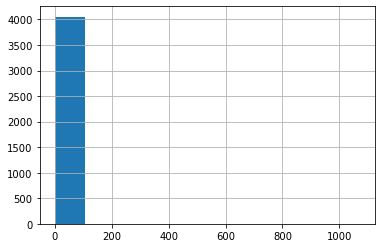

In [20]:

tweet_df["favorite_count"].hist() # create a histogram show the favorite count